Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read csv file and take a look at it
train = pd.read_csv("./train.csv")
train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [4]:
train.isnull().values.any()

False

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [5]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

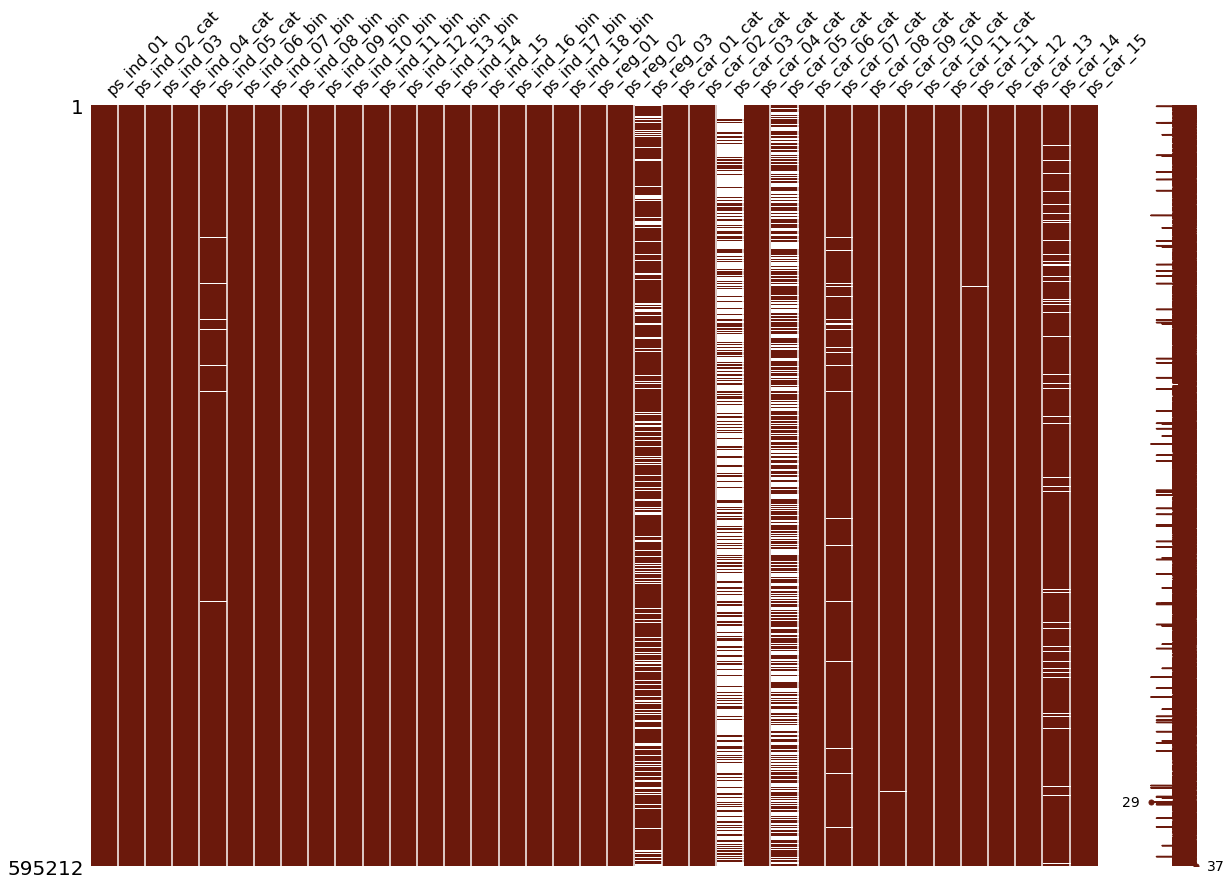

In [6]:
# If you don't have "Missingno" package, use this command to install
# (Linux) conda install -c conda-forge missingno
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [16]:
#pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [7]:
# List null columns name
# Hint: isnull()
# Your code here
#train_copy.isnull().sum()
isNullDF = {}
for column in train_copy:
    if train_copy[column].isnull().any():
        isNullDF[column] = train_copy[column].isnull().sum()
isNullDF     

{'ps_ind_02_cat': 216,
 'ps_ind_04_cat': 83,
 'ps_ind_05_cat': 5809,
 'ps_reg_03': 107772,
 'ps_car_01_cat': 107,
 'ps_car_02_cat': 5,
 'ps_car_03_cat': 411231,
 'ps_car_05_cat': 266551,
 'ps_car_07_cat': 11489,
 'ps_car_09_cat': 569,
 'ps_car_11': 5,
 'ps_car_12': 1,
 'ps_car_14': 42620}

#### Target variable inspection

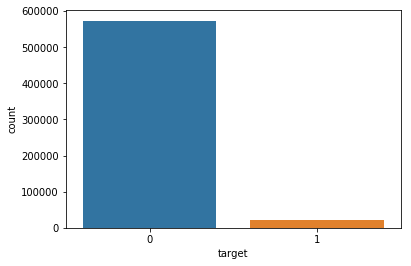

In [8]:
# Using countplot to represent target
# Your code here
sns.countplot(train["target"])

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [9]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

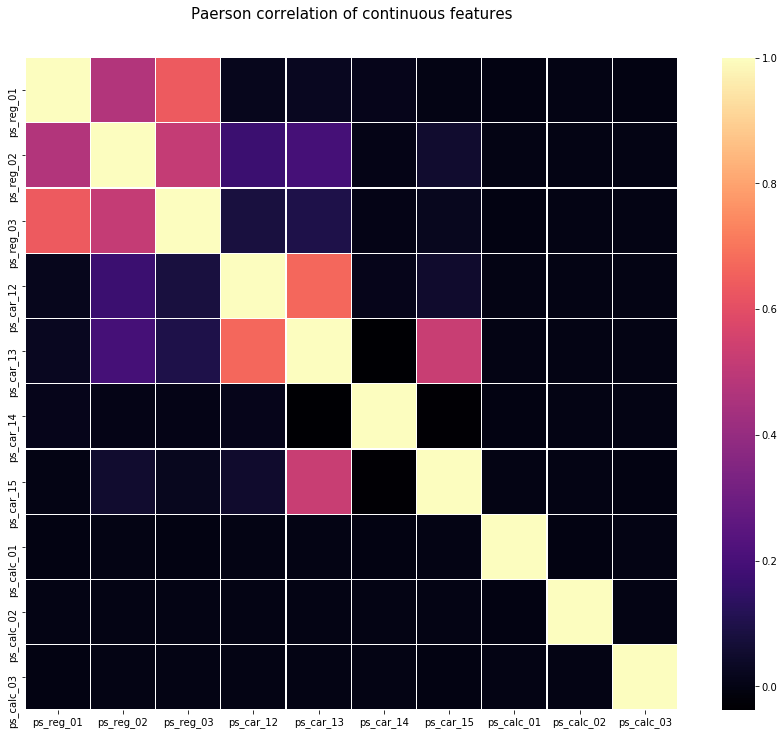

In [10]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

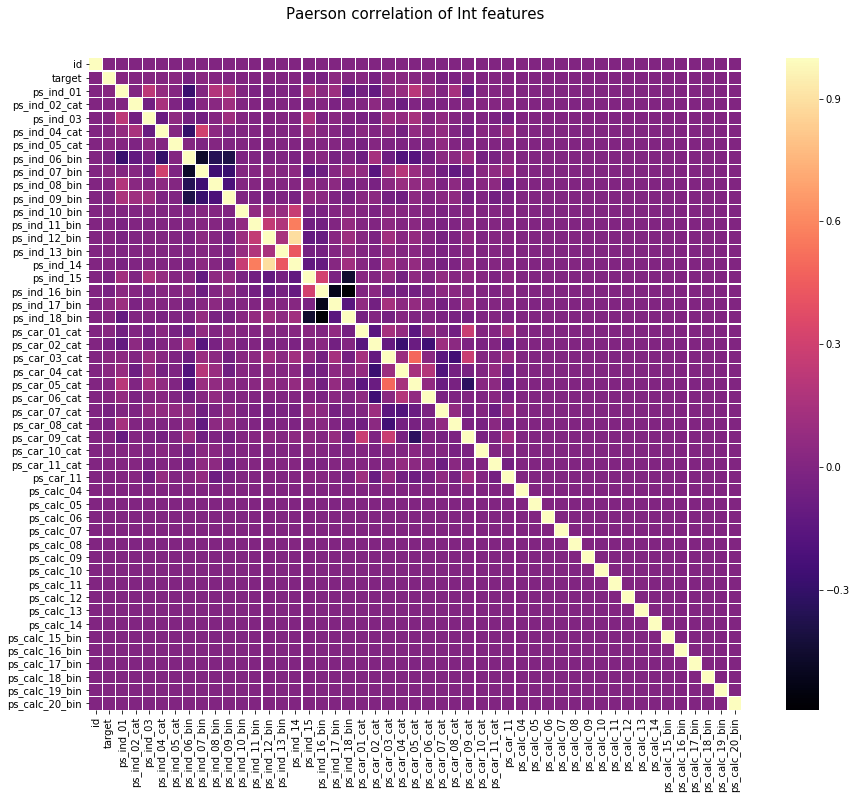

In [11]:
# Your code here
# Hint: correlation of train_int
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of Int features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

#### Which features have negatively correlation?
Negatively correlated features : Which is black in heat map
(ps_ind_06_bin,ps_ind_07_bin)
(ps_ind_15,ps_ind_18_bin)
(ps_ind_16_bin,ps_ind_18_bin)
(ps_ind_16_bin,ps_ind_17_bin)

### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [12]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [13]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,360852,442223,497644,484917,594990,594205,589594,594648,201882,523143,503879,522342,221514,265356,424278,387469,503955
1,234360,152989,97568,110295,222,1007,5618,564,393330,72069,91333,72870,373698,329856,170934,207743,91257


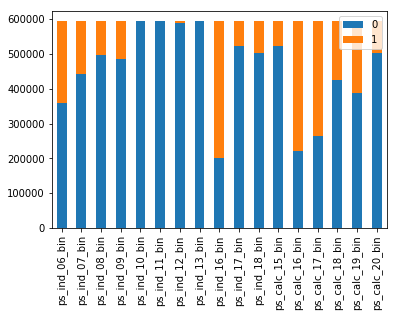

In [14]:
# hint pandas plot.bar with stacked=True
bin_value_counts.transpose().plot.bar(stacked=True)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [15]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

In [16]:
# Define X (features), y (target)
X = train.drop(columns="target")
y = train['target']

In [17]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state=101)

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

Percentage of normal transactions:  13.218355305614455
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  43388


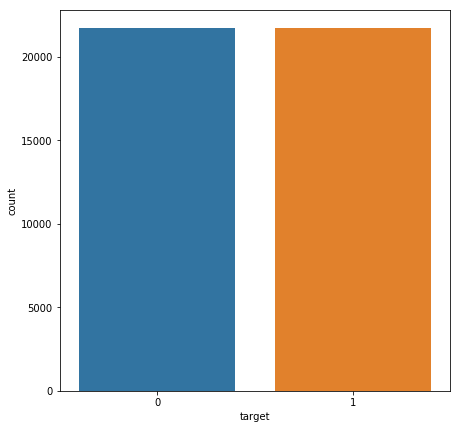

In [18]:
# Fraud/non-fraud data
# Select row which "Class" is 1 and save in fraud_data
fraud_data = train[train["target"]==1] # Your code here
# Select row which "Class" is 0 and save in non_fraud_data
non_fraud_data = train[train["target"]==0] # Your code here

# Number of fraud, non-fraud transactions
number_records_fraud = fraud_data.shape[0] #sum(fraud_data["Class"])# Your code here
number_records_non_fraud = non_fraud_data.shape[0] #sum(non_fraud_data["Class"]) # Your code here

# Using sample function on data frame to randomly select number_records_fraud from non_fraud_data data frame
under_sample_non_fraud = non_fraud_data.sample(number_records_fraud) # Your code here
# **concat** under_sample_non_fraud and fraud_data to form under_sample_data
under_sample_data = pd.concat([under_sample_non_fraud,fraud_data])

# Showing ratio
print("Percentage of normal transactions: ", non_fraud_data.shape[0]/under_sample_data.shape[0])
print("Percentage of fraud transactions: ", number_records_fraud/under_sample_data.shape[0])
print("Total number of transactions in resampled data: ", under_sample_data.shape[0])

# Assigning X,y for Under-sampled Data
X_train_undersample = under_sample_data.drop(columns="target")# Your code here
y_train_undersample = under_sample_data["target"]# Your code here

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
# Your code here
sns.countplot(under_sample_data['target'])
plt.show()

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  1147036


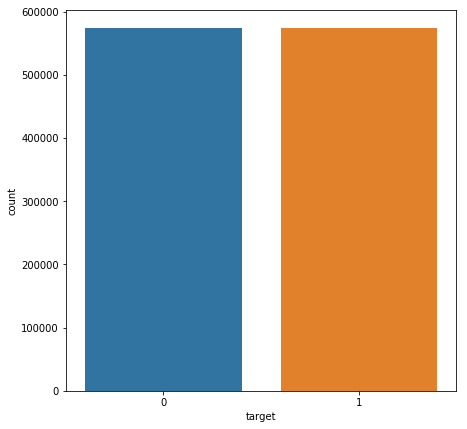

In [19]:
# Fraud/non-fraud data
# Select row which "Class" is 1 and save in fraud_data
fraud_data = train[train["target"]==1] # Your code here
# Select row which "Class" is 0 and save in non_fraud_data
non_fraud_data = train[train["target"]==0] # Your code here

# Number of fraud, non-fraud transactions
number_records_fraud = fraud_data.shape[0] #sum(fraud_data["Class"])# Your code here
number_records_non_fraud = non_fraud_data.shape[0] #sum(non_fraud_data["Class"]) # Your code here

# Using sample on fraud_data with replacement "replace = True",  since we take a larger sample than population
over_sample_fraud = fraud_data.sample(replace=True, n = number_records_non_fraud) # Your code here
# **concat** over_sample_fraud and non_fraud_data to form under_sample_data
over_sample_data = pd.concat ([over_sample_fraud,non_fraud_data]) # Your code here

# Showing ratio
print("Percentage of normal transactions: ", non_fraud_data.shape[0]/ over_sample_data.shape[0])
print("Percentage of fraud transactions: ", over_sample_fraud.shape[0] / over_sample_data.shape[0])
print("Total number of transactions in resampled data: ",  over_sample_data.shape[0])

# Assigning X, y for over-sampled dataset
X_train_oversample = over_sample_data.drop(columns="target")# Your code here
y_train_oversample = over_sample_data["target"]# Your code here

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
# Your code here
sns.countplot(over_sample_data["target"])
plt.show()

## 4. Modeling

In [20]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
# Import libraries and and create model
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
lr = LogisticRegression() # Your code here: create logistic regression model
dtc = DecisionTreeClassifier()# Your code here: create decision tree model
rfc = RandomForestClassifier() # Your code here: create random forest model
bnb = BernoulliNB()# Your code here: create BernoulliNB model
gnb = GaussianNB()# Your code here: create GaussianNB model
svm = LinearSVC()# Your code here: create SVM model

models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]

## 5. Evaluation Metrics

In [21]:
# Import confusion_matrix, classification_report
from sklearn.metrics import classification_report,confusion_matrix

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y):
    prediction = estimator.predict(X)
    # Note: We should test on the original test set
    print('Confusion matrix:\n', confusion_matrix(y,prediction))
    print('Classification report:\n', classification_report(y,prediction))
    print('Testing set information:\n', y.value_counts())

### Evaluate with Origin dataset

In [22]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_train,y_train)
    evaluate_model(model,X_test,y_test)
    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[172051      0]
 [  6513      0]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.00      0.00      0.00      6513

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Decision Tree


C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix:
 [[163693   8358]
 [  6100    413]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172051
           1       0.05      0.06      0.05      6513

   micro avg       0.92      0.92      0.92    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.92      0.92    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Random Forest


C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix:
 [[172045      6]
 [  6507      6]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.50      0.00      0.00      6513

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.73      0.50      0.49    178564
weighted avg       0.95      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Bernoulli NB
Confusion matrix:
 [[172051      0]
 [  6513      0]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.00      0.00      0.00      6513

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Gaussian 

C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix:
 [[172030     21]
 [  6502     11]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.34      0.00      0.00      6513

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.65      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64


### Evaluate with *Undersampled* dataset

In [23]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Undersampled dataset
    model.fit(X_train_undersample,y_train_undersample)
    evaluate_model(model,X_test,y_test)

    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[107716  64335]
 [  2921   3592]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.63      0.76    172051
           1       0.05      0.55      0.10      6513

   micro avg       0.62      0.62      0.62    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.62      0.74    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[93693 78358]
 [    0  6513]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.71    172051
           1       0.08      1.00      0.14      6513

   micro avg       0.56      0.56      0.56    178564
   macro avg       0.54      0.77      0.42    178564
weighted avg       0.97      0.56      0.68    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Random Fores

### Evaluate with *Oversampled* dataset

In [24]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Oversampled dataset
    model.fit(X_train_oversample,y_train_oversample)
    evaluate_model(model,X_test,y_test)
    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[108414  63637]
 [  2904   3609]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.63      0.77    172051
           1       0.05      0.55      0.10      6513

   micro avg       0.63      0.63      0.63    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.63      0.74    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[172051      0]
 [     0   6513]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    172051
           1       1.00      1.00      1.00      6513

   micro avg       1.00      1.00      1.00    178564
   macro avg       1.00      1.00      1.00    178564
weighted avg       1.00      1.00      1.00    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Random F

### Conclusion

Which model has lowest/highest accuracy?
Which model has lowest/highest recall?
Which model has lowest/highest f1?

Random forest and decision tree has highest Acc , recall, F1 score in oversampled data


Logistic Regression is the lowest acc,recall, f1 score in normal data

## 6. GridsearchCV

In [ ]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid)
grid_search.fit(X_train_oversample, y_train_oversample)
grid_search.best_params_

C:\Users\Schaefer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


#### which is the best combination of parameter

In [ ]:
# Your code here

# Done! Great Job.